In [5]:
import yfinance as yf
import pandas as pd

ticker = "AAPL"
data = yf.download(ticker, start = "2023-01-01", end = "2023-12-31")

historical_data = data[['Close', 'Volume']]

print(historical_data.head())

[*********************100%***********************]  1 of 1 completed

Price                           Close     Volume
Ticker                           AAPL       AAPL
Date                                            
2023-01-03 00:00:00+00:00  125.070000  112117500
2023-01-04 00:00:00+00:00  126.360001   89113600
2023-01-05 00:00:00+00:00  125.019997   80962700
2023-01-06 00:00:00+00:00  129.619995   87754700
2023-01-09 00:00:00+00:00  130.149994   70790800


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

X = historical_data[['Volume']]
y = historical_data['Close']

# Random State can be any integer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# choosing the number of clusters(k)
# group data into clusters based on characteristics
kmeans = KMeans(n_clusters=3)
historical_data['Volume_Cluster'] = kmeans.fit_predict(historical_data[['Volume']])



Date
2023-01-03 00:00:00+00:00    1
2023-01-04 00:00:00+00:00    0
2023-01-05 00:00:00+00:00    0
2023-01-06 00:00:00+00:00    0
2023-01-09 00:00:00+00:00    0
                            ..
2023-12-22 00:00:00+00:00    2
2023-12-26 00:00:00+00:00    2
2023-12-27 00:00:00+00:00    2
2023-12-28 00:00:00+00:00    2
2023-12-29 00:00:00+00:00    2
Name: Volume_Cluster, Length: 250, dtype: int32


/Users/tarundamodaran/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/63/xq0rcby97vjbyhbl3pvr62p80000gn/T/ipykernel_8812/61788531.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_data['Volume_Cluster'] = kmeans.fit_predict(historical_data[['Volume']])


In [9]:
# Forward-fill missing values
historical_data.fillna(method='ffill', inplace=True)

# Moving averages
historical_data['SMA_20'] = historical_data['Close'].rolling(window=20).mean()
historical_data['SMA_50'] = historical_data['Close'].rolling(window=50).mean()

# Volatility (standard deviation of daily returns)
historical_data['Volatility'] = historical_data['Close'].pct_change().rolling(window=20).std()

# Technical indicator (e.g., RSI - Relative Strength Index)
"""
The Relative Strength Index (RSI) is a popular momentum indicator used in technical analysis to measure the speed and change of price movements. 
It helps identify overbought or oversold conditions in a financial asset, typically stocks, and is widely used by traders to gauge the likelihood of a trend reversal.

Overbought Condition (Above 70): When RSI is above 70, the asset is generally considered overbought and may be due for a correction or price pullback.
Oversold Condition (Below 30): When RSI is below 30, the asset is generally considered oversold and may be due for a price rebound or reversal.
Neutral Zone (Between 30 and 70): In this range, the asset is neither overbought nor oversold.
"""
def calculate_rsi(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

historical_data['RSI'] = calculate_rsi(historical_data['Close'])


/var/folders/63/xq0rcby97vjbyhbl3pvr62p80000gn/T/ipykernel_8812/3411280041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_data.fillna(method='ffill', inplace=True)
/var/folders/63/xq0rcby97vjbyhbl3pvr62p80000gn/T/ipykernel_8812/3411280041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_data['SMA_20'] = historical_data['Close'].rolling(window=20).mean()
/var/folders/63/xq0rcby97vjbyhbl3pvr62p80000gn/T/ipykernel_8812/3411280041.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [10]:
from sklearn.preprocessing import StandardScaler

# Select features for scaling
# scale data to have mean of 0
features = historical_data[['Volume', 'SMA_20', 'SMA_50', 'Volatility', 'RSI']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict closing prices
y_pred = model.predict(X_test)

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


Mean Absolute Error: 15.105304996272421
Mean Squared Error: 350.07972967938724


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np

# Step 1: Fetch daily closing prices for a set of stocks
tickers = ["AAPL", "MSFT", "GOOGL"]  # Example tickers
stock_data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Close']

# Step 2: Calculate daily returns for each stock
daily_returns = stock_data.pct_change().dropna()  # Calculate daily returns and drop NaN values

# Step 3: Define portfolio weights (example: equally weighted portfolio)
weights = np.array([1/3, 1/3, 1/3])

# Step 4: Calculate weighted portfolio return
# Multiply each stock's daily return by its weight, then sum to get the portfolio's daily return
portfolio_returns = daily_returns.dot(weights)

# Convert to a DataFrame
portfolio_returns = pd.DataFrame(portfolio_returns, columns=["Portfolio_Return"])

# Display the first few rows of the portfolio returns DataFrame
print(portfolio_returns.head())


[*********************100%***********************]  3 of 3 completed

                           Portfolio_Return
Date                                       
2023-01-04 00:00:00+00:00         -0.015033
2023-01-05 00:00:00+00:00         -0.020529
2023-01-06 00:00:00+00:00          0.020601
2023-01-09 00:00:00+00:00          0.007204
2023-01-10 00:00:00+00:00          0.005539


In [14]:
# Assume `portfolio_returns` is a series of daily returns for a portfolio
annualized_return = portfolio_returns.mean() * 252  # Annualize daily return
annualized_volatility = portfolio_returns.std() * np.sqrt(252)  # Annualize volatility
sharpe_ratio = annualized_return / annualized_volatility

print("Annualized Return:", annualized_return)
print("Annualized Volatility:", annualized_volatility)
print("Sharpe Ratio:", sharpe_ratio)


Annualized Return: Portfolio_Return    0.482027
dtype: float64
Annualized Volatility: Portfolio_Return    0.208709
dtype: float64
Sharpe Ratio: Portfolio_Return    2.309567
dtype: float64


[*********************100%***********************]  5 of 5 completed
/Users/tarundamodaran/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Feature Data:
         Mean Return  Volatility  Mean Volume
Ticker                                      
AAPL       0.001812    0.012566   172.549000
AMZN       0.002511    0.020805   121.372800
GOOGL      0.001990    0.019149   118.794720
MSFT       0.001936    0.015832   313.951001
TSLA       0.003893    0.033166   217.475240
Clustered Feature Data:
         Mean Return  Volatility  Mean Volume  Cluster
Ticker                                               
AAPL       0.001812    0.012566   172.549000        1
AMZN       0.002511    0.020805   121.372800        2
GOOGL      0.001990    0.019149   118.794720        2
MSFT       0.001936    0.015832   313.951001        1
TSLA       0.003893    0.033166   217.475240        0


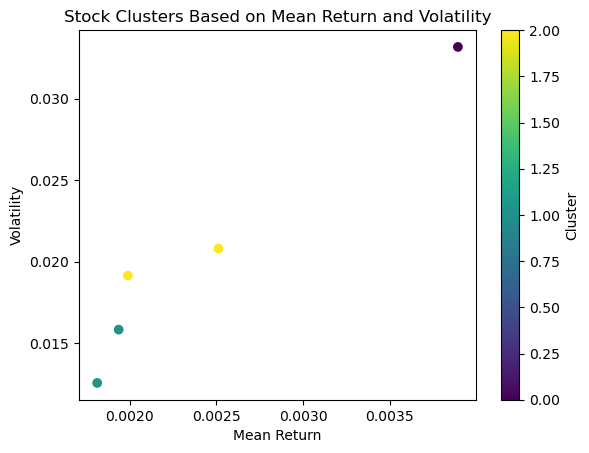

In [15]:
import yfinance as yf
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fetch data for multiple stocks
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
stock_data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Close']

# Calculate daily returns
daily_returns = stock_data.pct_change().dropna()

# Calculate features for each stock
feature_data = pd.DataFrame({
    'Mean Return': daily_returns.mean(),
    'Volatility': daily_returns.std(),
    'Mean Volume': stock_data.mean()
})

print("Feature Data:\n", feature_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
feature_data['Cluster'] = kmeans.fit_predict(feature_data[['Mean Return', 'Volatility']])

print("Clustered Feature Data:\n", feature_data)

# Visualize the clusters
plt.scatter(feature_data['Mean Return'], feature_data['Volatility'], c=feature_data['Cluster'], cmap='viridis')
plt.xlabel("Mean Return")
plt.ylabel("Volatility")
plt.title("Stock Clusters Based on Mean Return and Volatility")
plt.colorbar(label='Cluster')
plt.show()
